<a href="https://colab.research.google.com/github/fluffymouses/fluffymouses/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/crimes_against_women_2001-2014.csv")
df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
"""



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#приверка на пропуски. По результату кода, их нет
df_cluster = df.copy()
for col in df_cluster.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
STATE/UT - 0%
DISTRICT - 0%
Year - 0%
Rape - 0%
Kidnapping and Abduction - 0%
Dowry Deaths - 0%
Assault on women with intent to outrage her modesty - 0%
Insult to modesty of Women - 0%
Cruelty by Husband or his Relatives - 0%
Importation of Girls - 0%


In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler

num_features = df_cluster.select_dtypes(include=['int']).columns
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["Dowry Deaths"].unique()



array([6.48035642e-03, 2.83515593e-03, 5.67031187e-03, 6.88537870e-03,
       4.86026731e-03, 0.00000000e+00, 9.72053463e-03, 2.51113811e-02,
       4.05022276e-03, 5.26528959e-03, 1.05305792e-02, 1.25556906e-02,
       7.69542325e-03, 2.02511138e-03, 1.49858242e-02, 4.05022276e-04,
       2.43013366e-03, 8.10044552e-04, 1.21506683e-03, 2.10611584e-02,
       6.07533414e-03, 1.70109356e-01, 3.64520049e-03, 1.62008910e-03,
       2.38963143e-02, 4.45524504e-03, 1.33657351e-02, 8.50546780e-03,
       3.24017821e-03, 8.10044552e-03, 9.31551235e-03, 8.91049008e-03,
       1.01255569e-02, 2.79465371e-02, 1.90360470e-02, 3.64520049e-02,
       1.45808019e-02, 2.71364925e-02, 1.29607128e-02, 3.47914135e-01,
       2.83515593e-02, 7.29040097e-03, 1.15431349e-01, 1.21506683e-02,
       8.78898339e-02, 1.62008910e-02, 1.13406237e-02, 8.91049008e-02,
       1.09356015e-02, 1.37707574e-02, 1.66059133e-02, 1.17456460e-02,
       2.46658566e-01, 1.41757797e-02, 1.53908465e-02, 1.24746861e-01,
      

In [ ]:

#StandatdScaler

standard_scaler = StandardScaler()
st_scaler = df_cluster.copy()
st_scaler[num_features] = standard_scaler.fit_transform(df_cluster[num_features])
st_scaler["Rape"].unique()

array([-4.25523245e-02, -1.34134938e-01, -6.29040164e-02, -3.23764786e-02,
       -8.32557082e-02, -2.05365859e-01,  3.88544429e-02,  4.25536588e-01,
       -1.03607400e-01, -7.30798623e-02,  5.92061347e-02,  1.10085364e-01,
       -1.20247867e-02, -1.54486630e-01,  1.71140440e-01, -1.95190013e-01,
       -1.44310784e-01, -1.85014167e-01, -1.74838321e-01,  3.23778129e-01,
       -5.27281704e-02,  4.06848943e+00, -1.13783246e-01, -1.64662476e-01,
        3.95009050e-01, -9.34315541e-02,  1.30437056e-01,  8.32690511e-03,
       -1.23959092e-01, -1.84894082e-03,  2.86785970e-02,  1.85027510e-02,
        4.90302888e-02,  4.96767509e-01,  2.72898899e-01,  7.10460274e-01,
        1.60964594e-01,  4.76415818e-01,  1.20261210e-01,  8.53568579e+00,
        5.06943355e-01, -2.22006327e-02,  2.69475023e+00,  9.99095184e-02,
        2.00279271e+00,  2.01667978e-01,  7.95578266e-02,  2.03332024e+00,
        6.93819806e-02,  1.40612902e-01,  2.11843824e-01,  8.97336725e-02,
        5.99172431e+00,  

In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_cluster['DISTRICT'].unique()

df_cluster['DISTRICT']= label_encoder.fit_transform(df_cluster['DISTRICT'])

df_cluster['DISTRICT'].unique()


df_cluster['STATE/UT'].unique()

df_cluster['STATE/UT']= label_encoder.fit_transform(df_cluster['DISTRICT'])

df_cluster['STATE/UT'].unique()

array([   3,   31,  281, ...,  906,  822, 1174])

In [5]:
df_cluster

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,3,3,2001,50,30,16,149,34,175,0
1,1,31,31,2001,23,30,7,118,24,154,0
2,2,281,281,2001,27,34,14,112,83,186,0
3,3,302,302,2001,20,20,17,126,38,57,0
4,4,433,433,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,906,906,2014,1,0,0,1,2,0,0
10673,833,1507,1507,2014,1,0,0,1,2,0,0
10674,834,822,822,2014,3,1,0,12,1,1,0
10675,835,1174,1174,2014,7,6,1,20,7,3,0


In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""


'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


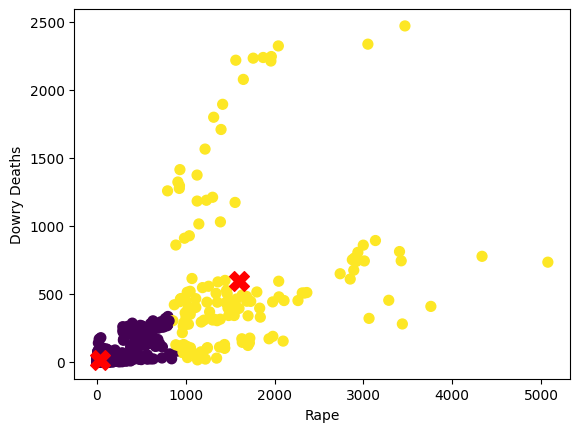

In [19]:
#k-means

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
X = df_cluster[["Rape", "Dowry Deaths"]]
X
# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
# Визуализируем результаты кластеризации
plt.scatter(df["Rape"], df["Dowry Deaths"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Rape')
plt.ylabel('Dowry Deaths')
plt.show()

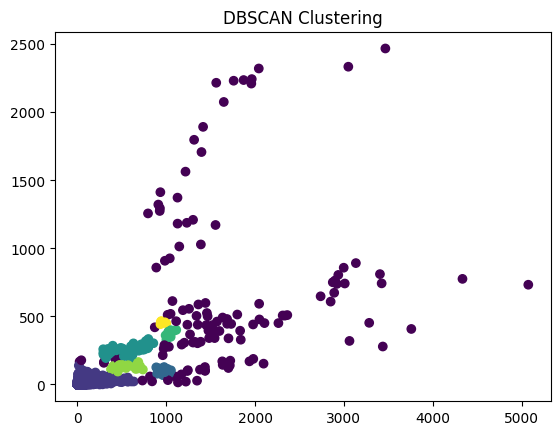

In [10]:
# метрики

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# выше

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# выше

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""


In [ ]:
# выше

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [6]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=5bbb34cf60b6ee97dda5d7fb35eea282e2eff8fbbc70798be8acef82dbc5ed4e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
  

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [11]:
#PCA сжатие
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(10677, 2)


,PC1,PC2
0,-8.932144,-1.241643
1,-37.385568,-0.607089
2,-31.258874,4.633485
3,-36.836749,9.818782
4,-35.699063,4.099895


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X)


from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
"""Тк я выбрала 2 параметра, то  нет смысла делать эту часть задания. На графиках выше видна связь, как кластеры распределялись"""

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



Оптимальное число кластеров 2, с баллом 0.9629046816219513


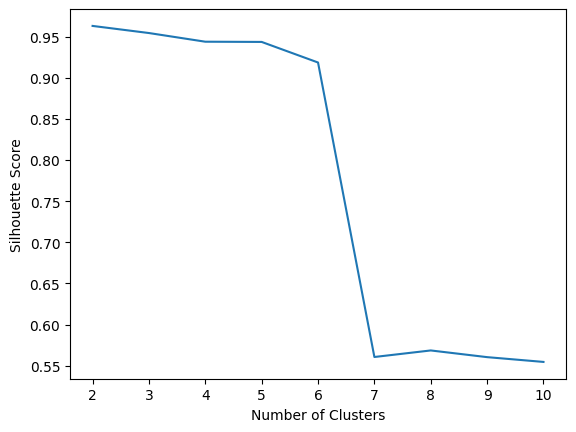

In [18]:


# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()